# Convoluciones

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/home/hectorsab/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Cargamos la imágen.

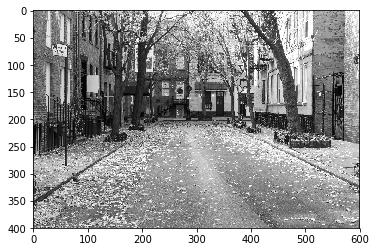

In [64]:
im = cv2.imread('street.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im = cv2.resize(im,None,fx=0.2,fy=0.2)
plt.imshow(im,cmap="gray")

# Image dimensions
im_h = im.shape[0]
im_w = im.shape[1]

Cambiamos el tamaño de la imágen a uno más pequeño.

In [65]:
im = im.reshape(1,im_h,im_w,1)

Creamos una variable que contenga a la imágen en tensorflow.

In [66]:
input_image = tf.Variable(np.array(im, dtype=np.float32))
print(input_image)

<tf.Variable 'Variable_18:0' shape=(1, 400, 600, 1) dtype=float32_ref>


Definimos el kernel que queramos usar y creamos una variable que lo contenga en tensorflow.

In [67]:
# Blur
kernel = np.array([[1.,2.,1.],
                   [2.,4.,2.],
                   [1.,2.,1.]])

kernel = kernel.reshape(3,3,1,1)
blur_kernel = tf.Variable(np.array(kernel, dtype=np.float32))
print(blur_kernel)

<tf.Variable 'Variable_19:0' shape=(3, 3, 1, 1) dtype=float32_ref>


In [68]:
# Edges
kernel = np.array([[-1.,-1.,-1.],
                   [-1.,8.,-1.],
                   [-1.,-1.,-1.]])

kernel = kernel.reshape(3,3,1,1)
edges_kernel = tf.Variable(np.array(kernel, dtype=np.float32))
print(edges_kernel)

<tf.Variable 'Variable_20:0' shape=(3, 3, 1, 1) dtype=float32_ref>


Definimos la operación de convolución entre la imágen y el kernel que deseemos.

In [69]:
convolution = tf.nn.conv2d(input=input_image,filter=edges_kernel,padding="SAME",strides=[1,1,1,1])

Creamos una sesión e inicializamos los pesos.

In [70]:
sess = tf.Session()

In [71]:
sess.run(tf.global_variables_initializer())

Solicitamos el resultado de la convolución.

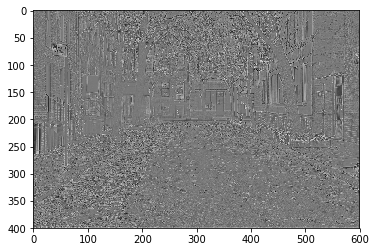

In [74]:
resultado = sess.run(convolution)

plt.imshow(resultado[0,:,:,0],cmap="gray")

# ¿Ahora?

Varía el los kernels, el stride y el tipo de padding.

Mas kernels en [wikipedia.](https://en.wikipedia.org/wiki/Kernel_(image_processing)